In [1]:
import base64
import datetime
import json
import os
import random
import time

import scipy
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
#import seaborn as sns
#import statsmodels as sm
from pylab import rcParams
from pylab import *
from matplotlib.dates import date2num , DateFormatter
from PIL import Image

np.random.seed(1337)

%matplotlib inline
#sns.set(font_scale=1.0)
#rcParams['figure.figsize'] = 8, 6
#sns.set_style('whitegrid')
#sns.set_palette(sns.color_palette('muted'))

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Pillow

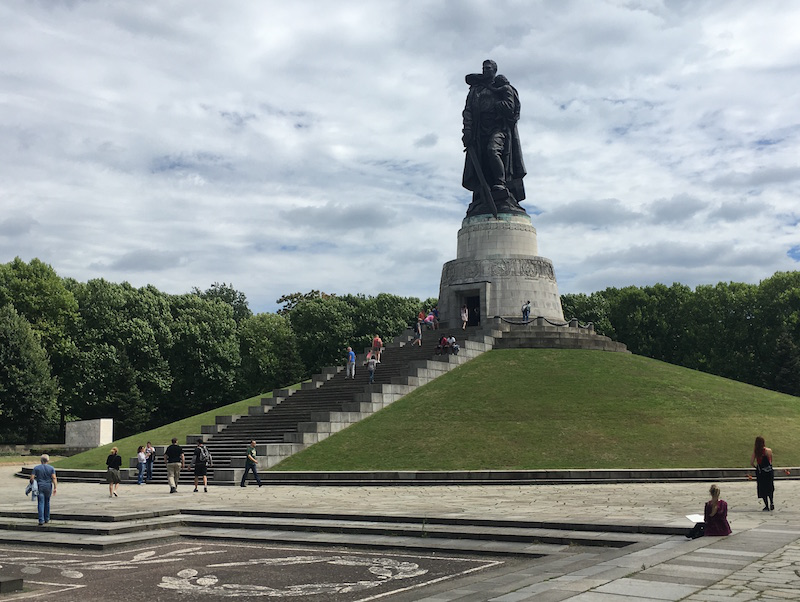

In [2]:
im = Image.open('img/treptow.jpg')
im

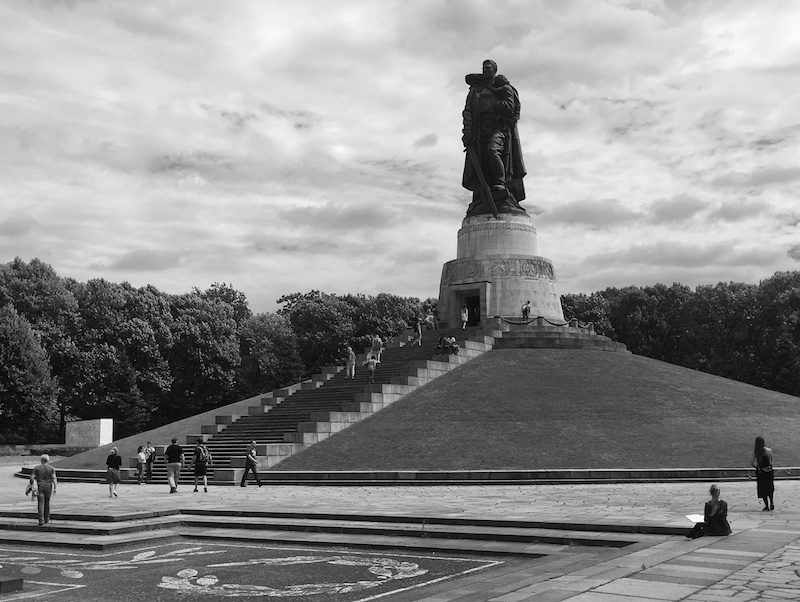

In [3]:
im.convert('L')

In [4]:
im.convert('L').save('img/treptow_bw.png')

In [5]:
[os.path.join('img/', f) for f in os.listdir('img/') if f.endswith('.jpg')]

['img/treptow.jpg']

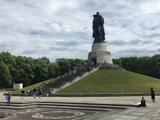

In [6]:
im.thumbnail((160, 120))
im

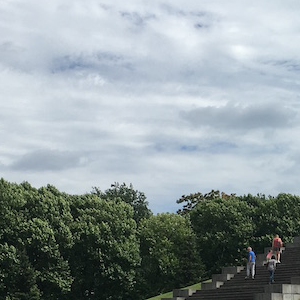

In [7]:
im = Image.open('img/treptow.jpg')
box = (100, 100, 400, 400)
region = im.crop(box)
region

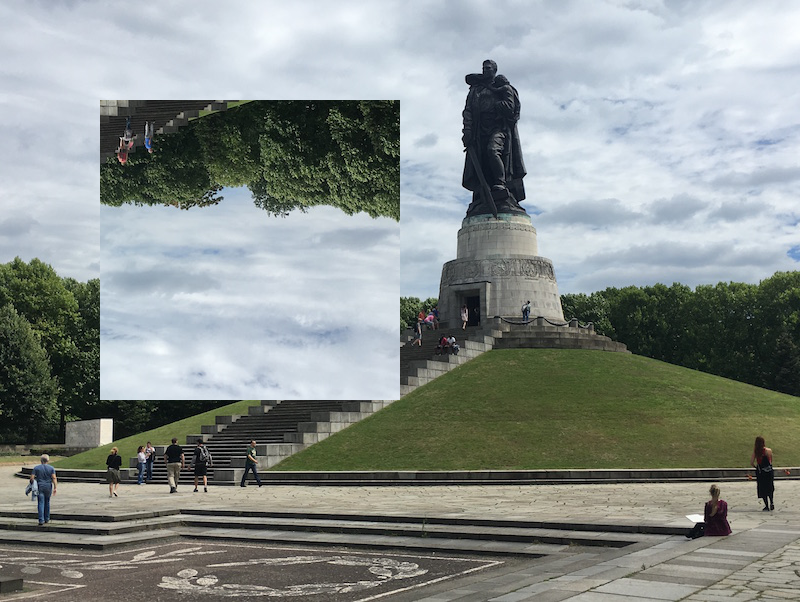

In [8]:
region = region.transpose(Image.ROTATE_180)
im.paste(region, box)
im

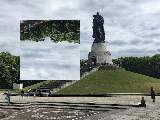

In [9]:
im.resize((160, 120))

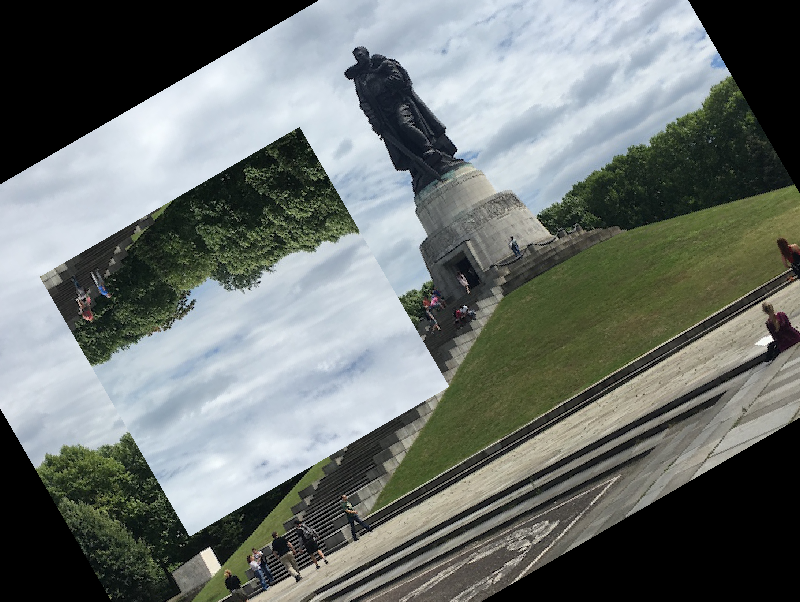

In [10]:
im.rotate(30)

# Matplotlib

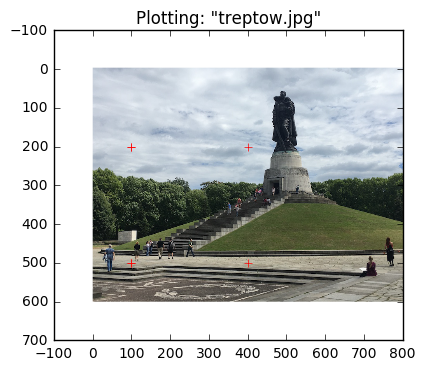

In [19]:
im = array(Image.open('img/treptow.jpg'))
imshow(im)

x = [100, 100, 400, 400]
y = [200, 500, 200, 500]

plot(x, y, 'r+')
plot(x[:2], y[:2], 'r+')

title('Plotting: "treptow.jpg"')

show()

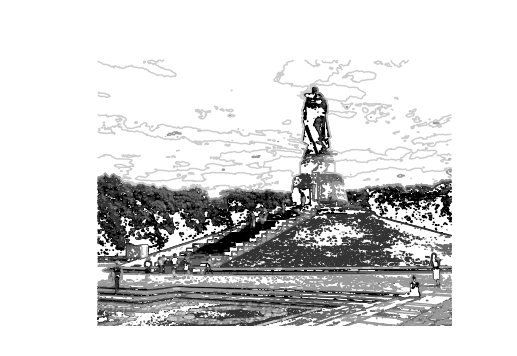

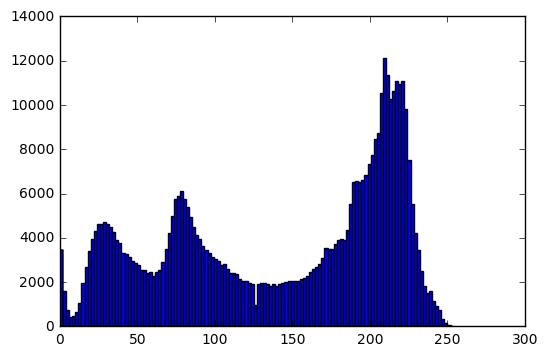

In [12]:
im = array(Image.open('img/treptow.jpg').convert('L'))

figure()
gray()
contour(im, origin='image')
axis('equal')
axis('off')

figure()
hist(im.flatten(), 128)

show()

# NumPy

In [13]:
im = array(Image.open('img/treptow.jpg'))
print im.shape, im.dtype

(602, 800, 3) uint8


In [14]:
im = array(Image.open('img/treptow.jpg').convert('L'), 'f')
print im.shape, im.dtype

(602, 800) float32


In [15]:
im[100, 100]

224.0

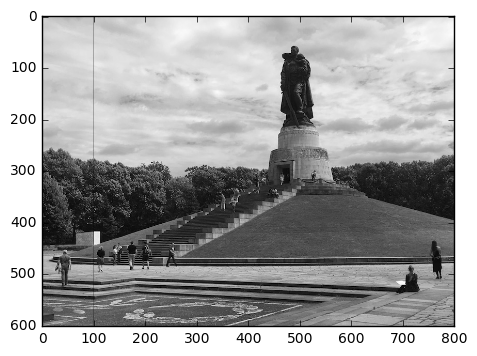

In [16]:
im[:, 100] = 0
imshow(im)

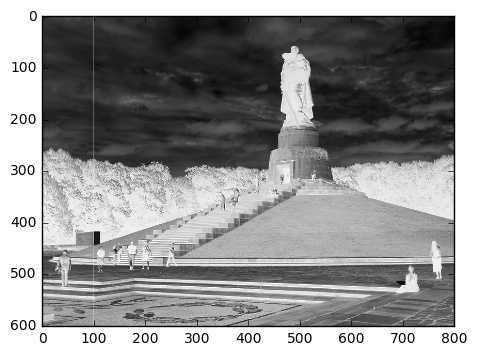

In [17]:
im2 = 255 - im
imshow(im2)

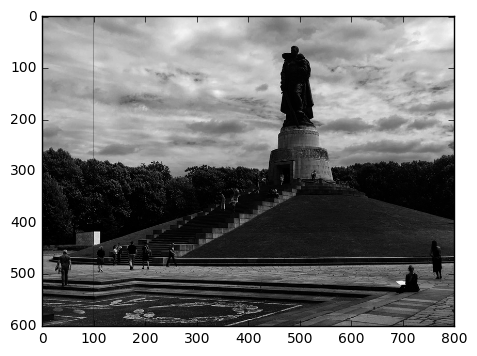

In [18]:
im3 = 255.0 * (im / 255.0)**2
imshow(im3)

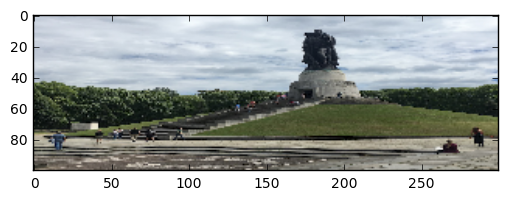

In [22]:
im4 = array(Image.fromarray(im).resize((300, 100)))
imshow(im4)

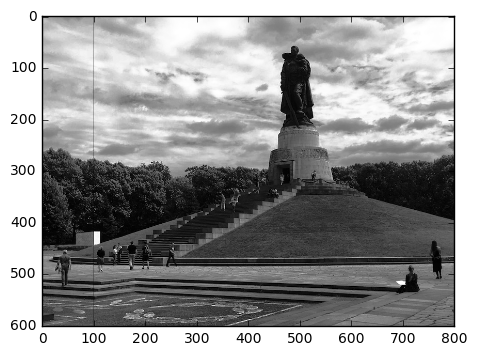

In [26]:
imhist, bins = histogram(im3.flatten(), 100, normed=True)
cdf = imhist.cumsum()
cdf = 255 * cdf / cdf[-1]
im5 = interp(im3.flatten(), bins[:-1], cdf)
imshow(im5.reshape(im3.shape))